In [1]:
# Importing Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [2]:
# Creating Quantum and Classical Registers
# This is another method to create registers.
quantum_register= QuantumRegister(1)
classical_register= ClassicalRegister(1)

In [3]:
quantum_circuit= QuantumCircuit(quantum_register, classical_register)


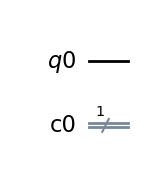

In [4]:
# To view the circuit
quantum_circuit.draw(output='mpl')

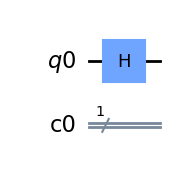

In [5]:
# Adding H Gate to the circuit
# The 0 indicates the 'q0' register
quantum_circuit.h(0)

# Draw the circuit again
quantum_circuit.draw(output='mpl')

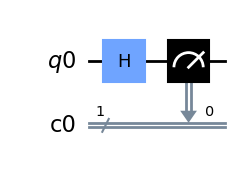

In [6]:
# Now we have to measure this to see how the gate works
# 0,0 defines quantum register 0 (q0) to classical register 0 (c0)
# If you use measure_all() you will no longer need the classical register.
quantum_circuit.measure(0,0)
quantum_circuit.draw(output='mpl')

In [7]:
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
# You will get a huge result, but we only care about the 'counts'
print(result)

Result(backend_name='qasm_simulator', backend_version='0.12.2', qobj_id='', job_id='1e6a4b6f-c792-4687-adbe-504795641b4e', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 532, '0x1': 492}), header=QobjExperimentHeader(creg_sizes=[['c0', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-120', qreg_sizes=[['q0', 1]], metadata={}), status=DONE, seed_simulator=456421273, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0], 'num_clbits': 1, 'parallel_state_update': 8, 'sample_measure_time': 0.000950876, 'num_qubits': 1, 'device': 'CPU', 'input_qubit_map': [[0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.006454931)], date=2024-03-11T13:17:00.912918, status=COMPLETED, header=None, metadata={'time_taken_execute': 0.006558046, 'mpi_rank': 0, 'num_mpi_processes': 1, 'ma

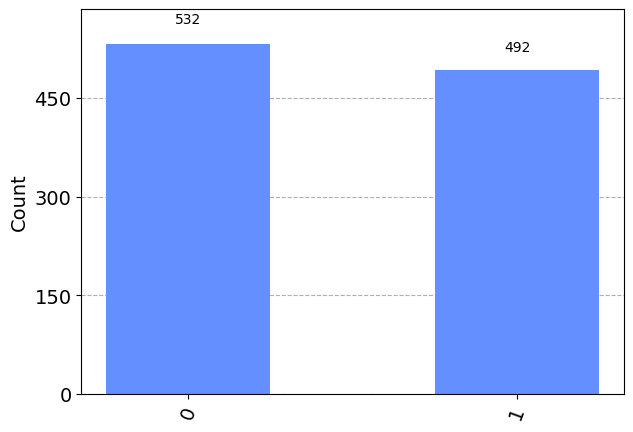

In [8]:
# We can plot a histogram to see the count values
from qiskit.visualization import plot_histogram
# This line of code below illustrates how to get counts from the output. 
#Note that you need to give the circuit name.
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)

In [9]:
# Let us see the counts
print(counts)

{'0': 532, '1': 492}


In [10]:
from qiskit import IBMQ,execute

# This step is for first time users.
IBMQ.save_account('8d9fd4cfb1139b39e920a5e17a2d932dcf89a73f3c9441d31cf617139f3cb47ac4eb912c2ada92145a2c9bef7d5c22ca825b5cbe3a6590b599bbce8872f1d216')
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

/tmp/ipykernel_434706/106174153.py:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('8d9fd4cfb1139b39e920a5e17a2d932dcf89a73f3c9441d31cf617139f3cb47ac4eb912c2ada92145a2c9bef7d5c22ca825b5cbe3a6590b599bbce8872f1d216')
/tmp/ipykernel_434706/106174153.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('8d9fd4cfb1139b39e920a5e17a2d932dcf

In [11]:
# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders

print([backend.name() for backend in IBMQ.providers()[0].backends()])

['ibmq_qasm_simulator', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibm_brisbane', 'ibm_kyoto', 'ibm_osaka']


In [12]:
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibm_brisbane')
job = execute(quantum_circuit, backend=backend, shots=1000 )
job_monitor(job)
results = job.result()

Job Status: job has successfully run


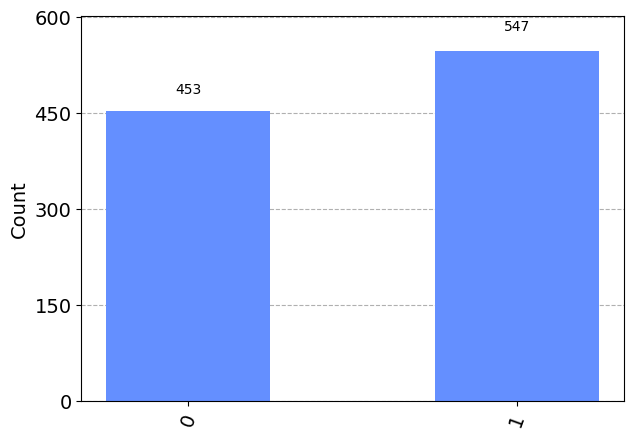

In [13]:
# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)